#**Task 1: Exploratory Data Analysis (EDA) and Business Insights**
1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDA.
○ Write these insights in short point-wise sentences (maximum 100 words per
insight).

**1. Import Necessary Libraries**
* Purpose: Import libraries for data manipulation, visualization, and machine learning tasks.
* pandas and numpy: For data handling and computation.
* matplotlib and seaborn: For data visualization.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**2. Load and Merge Datasets**
* Purpose:
* Load the three datasets: Customers, Products, and Transactions.
* Merge them into a single dataset data2:
* First merge transactions with customers on CustomerID.Then merge the result with products on ProductID.

In [ ]:
# Load datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions - Transactions.csv')

**3. Initial Data Inspection**
* Purpose: View the first few rows (.head()) and the structure of the datasets (.shape, .info()) to understand their size and data types.

In [ ]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
customers.shape

(200, 4)

In [ ]:
products.shape

(100, 4)

In [ ]:
transactions.shape

(1000, 7)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


**4. Merging Datasets**
* Purpose: Combine all datasets into a single DataFrame data for unified analysis. Merging is done on CustomerID and ProductID.

In [ ]:
# Merge datasets for analysis
data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')


In [ ]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [ ]:
data.shape

(1000, 13)

In [ ]:
data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


**5. Checking for Missing Values**
* Purpose: Identify missing values in the dataset, which may require handling (e.g., imputation or removal).

In [ ]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


**6. Converting Date Columns**
* Purpose: Convert date columns to datetime format for time-based operations like extracting years or months.

In [ ]:
# Convert date columns to datetime format
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

In [ ]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


**7. Feature Engineering**
* Purpose: Create new columns for the year and month of transactions to analyze trends over time.

In [ ]:
# Feature engineering: Add year and month columns
data['TransactionYear'] = data['TransactionDate'].dt.year
data['TransactionMonth'] = data['TransactionDate'].dt.month

In [ ]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,TransactionYear,TransactionMonth
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,8
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,5
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,4
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,3
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,3


**8. Descriptive Statistics**
* Purpose: Generate summary statistics for numerical columns to understand data distribution and variability.

In [ ]:
# Summary statistics
print("Summary Statistics:")
data.describe()


Summary Statistics:


,TransactionDate,Quantity,TotalValue,Price_x,SignupDate,Price_y,TransactionYear,TransactionMonth
count,1000,1000.000000,1000.000000,1000.00000,1000,1000.00000,1000.000000,1000.000000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023-07-09 02:49:55.199999744,272.55407,2023.996000,6.288000
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2022-01-22 00:00:00,16.08000,2023.000000,1.000000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2022-09-17 12:00:00,147.95000,2024.000000,3.000000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2023-07-23 00:00:00,299.93000,2024.000000,6.000000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024-04-12 00:00:00,404.40000,2024.000000,9.000000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024-12-28 00:00:00,497.76000,2024.000000,12.000000
std,NaN,1.117981,493.144478,140.73639,NaN,140.73639,0.063151,3.437859


In [ ]:
transactions_summary = transactions.describe()

In [ ]:
products_summary = products.describe()

In [ ]:

region_distribution = data['Region'].value_counts()
region_distribution

,count
Region,
South America,304
North America,244
Europe,234
Asia,218


**9. Sales Analysis by Region**

In [ ]:

# Total sales by region
region_sales = data.groupby('Region')['TotalValue'].sum()
region_sales

,TotalValue
Region,
Asia,152074.97
Europe,166254.63
North America,152313.40
South America,219352.56


**10. Product Category Analysis**

In [ ]:
# Top product categories by sales
category_sales = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_sales

,TotalValue
Category,
Books,192147.47
Electronics,180783.50
Clothing,166170.66
Home Decor,150893.93


**11. Customer Signup Trends**

In [ ]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
# Customer activity over time (signups)
# Ensure SignupDate is in datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trend = customers['SignupDate'].dt.year.value_counts().sort_index()
signup_trend

,count
SignupDate,
2022,64
2023,57
2024,79


**12. Visualizations**

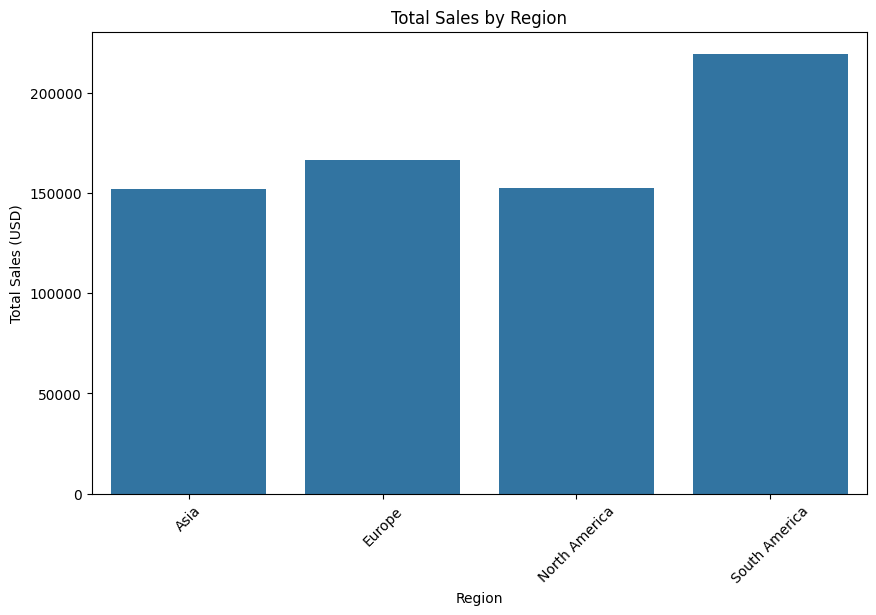

In [ ]:
# Visualizing sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()


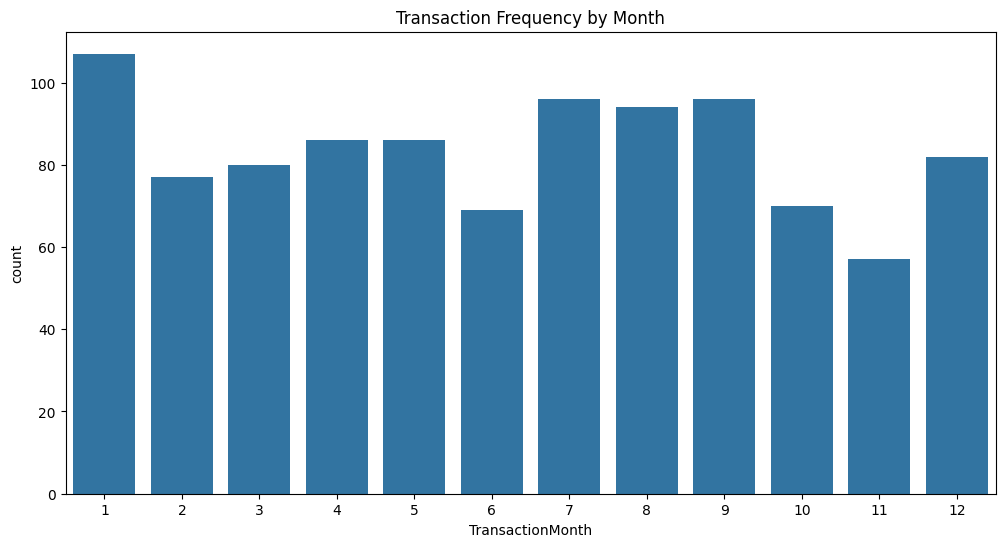

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='TransactionMonth', data=data)
plt.title('Transaction Frequency by Month')
plt.show()


In [ ]:
data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y', 'TransactionYear',
       'TransactionMonth'],
      dtype='object')

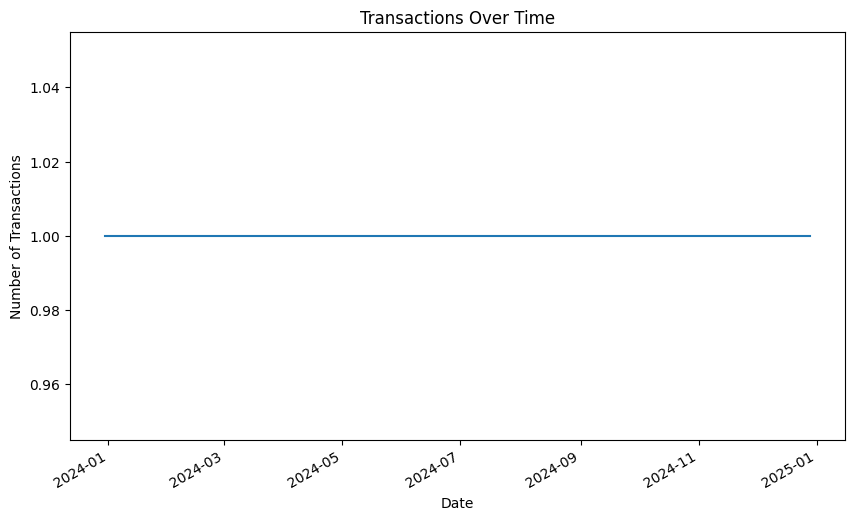

In [ ]:

# Distribution of Transactions Over Time
plt.figure(figsize=(10, 6))
data.groupby('TransactionDate').size().plot(title="Transactions Over Time", xlabel="Date", ylabel="Number of Transactions")
plt.show()

In [ ]:

top_products = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products

,TotalValue
ProductName,
ActiveWear Smartwatch,39096.97
SoundWave Headphones,25211.64
SoundWave Novel,24507.90
ActiveWear Jacket,22712.56
ActiveWear Rug,22314.43
TechPro Headphones,19513.80
BookWorld Cookbook,19221.99
BookWorld Sweater,18743.79
TechPro Textbook,18267.96


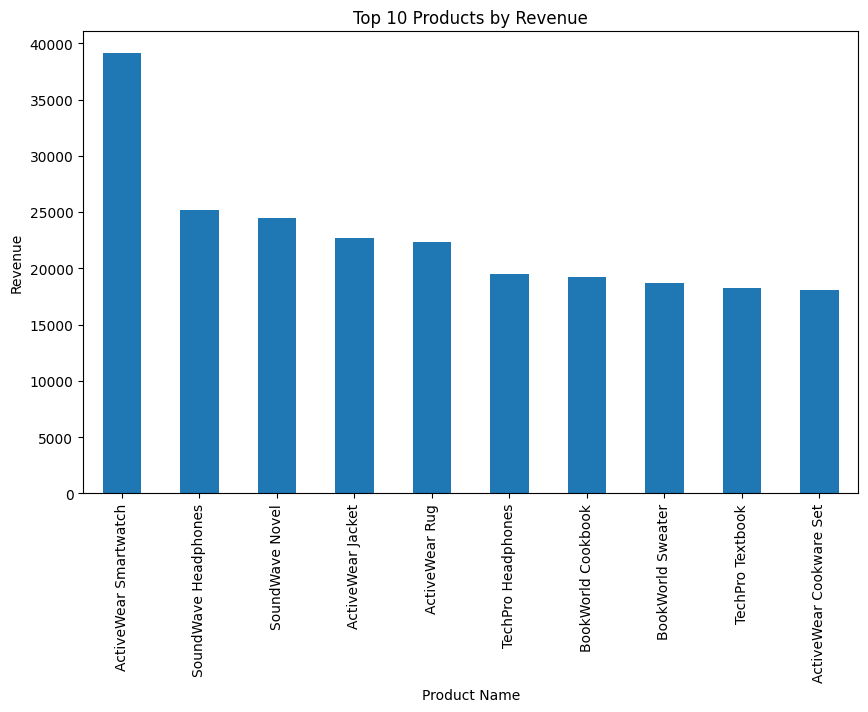

In [ ]:

#  Top Products by Revenue
top_products = data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', title="Top 10 Products by Revenue", xlabel="Product Name", ylabel="Revenue")
plt.show()

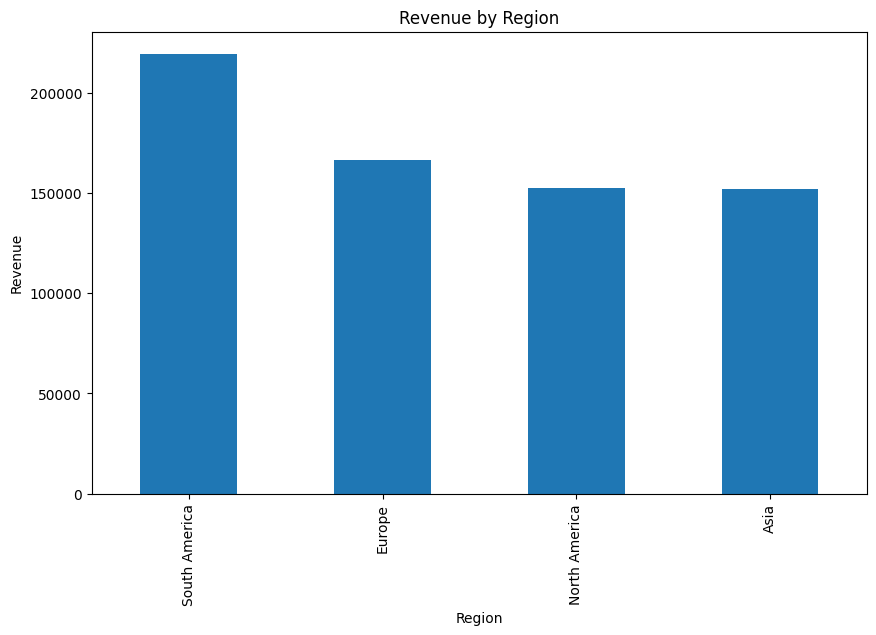

In [ ]:
# Regional Revenue Distribution
regional_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
regional_revenue.plot(kind='bar', title="Revenue by Region", xlabel="Region", ylabel="Revenue")
plt.show()

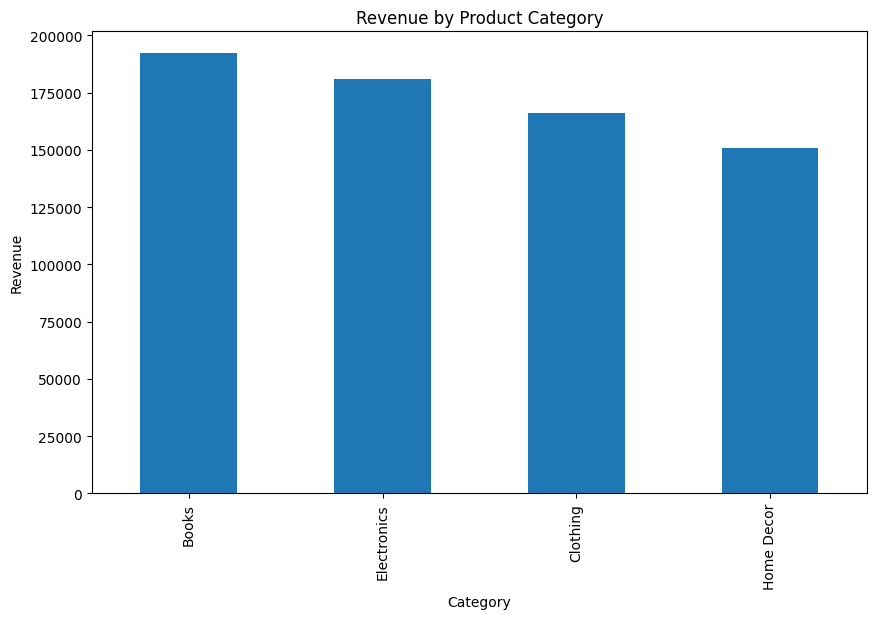

In [ ]:

# Category Analysis
category_sales = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', title="Revenue by Product Category", xlabel="Category", ylabel="Revenue")
plt.show()

In [ ]:

customer_ltv = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
customer_ltv

,TotalValue
CustomerID,
C0141,10673.87
C0054,8040.39
C0065,7663.70
C0156,7634.45
C0082,7572.91
C0188,7111.32
C0059,7073.28
C0028,6819.57
C0099,6715.72


In [ ]:


customer_ltv = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

customer_ltv_df = pd.DataFrame({'CustomerID': customer_ltv.index, 'LifetimeValue': customer_ltv.values})

customer_ltv_df = pd.merge(customer_ltv_df, customers[['CustomerID', 'CustomerName']], on='CustomerID', how='left')

# Display the top 10 customers by Lifetime Value
print(customer_ltv_df[['CustomerName', 'CustomerID', 'LifetimeValue']])

           CustomerName CustomerID  LifetimeValue
0          Paul Parsons      C0141       10673.87
1          Bruce Rhodes      C0054        8040.39
2          Gerald Hines      C0065        7663.70
3         William Adams      C0156        7634.45
4          Aimee Taylor      C0082        7572.91
5             Anna Ball      C0188        7111.32
6  Mrs. Kimberly Wright      C0059        7073.28
7         Jennifer Pena      C0028        6819.57
8          Rodney Eaton      C0099        6715.72
9         Juan Mcdaniel      C0165        6708.10


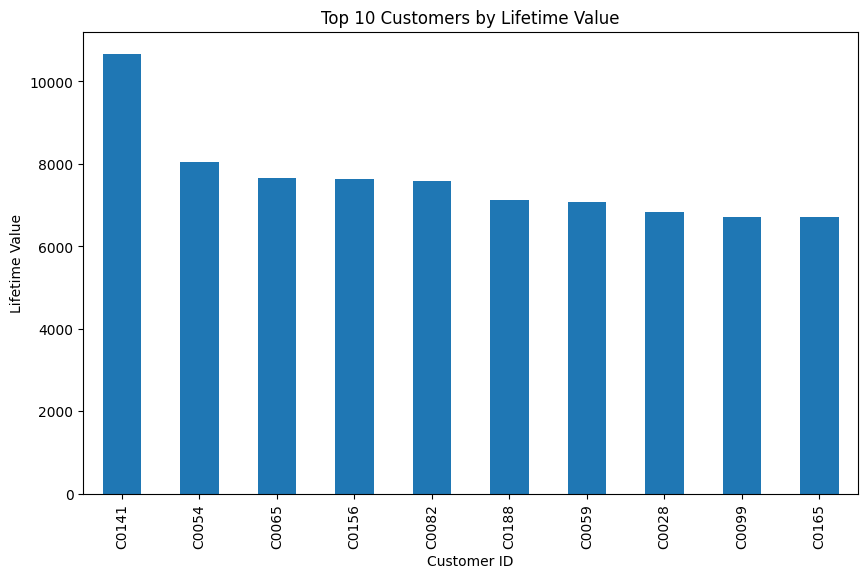

In [ ]:
# Customer Lifetime Value
customer_ltv = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
customer_ltv.plot(kind='bar', title="Top 10 Customers by Lifetime Value", xlabel="Customer ID", ylabel="Lifetime Value")
plt.show()

#Business Insights Derived from Visualizations:
  **1.Regional Sales Performance:**

*  	South America is the Highest performing region. This region (with the highest sales bars in "Total Sales by Region") should be prioritized for increased marketing and inventory allocation.
*   Asia and followed by North America are the Underperforming regions. These Underperforming regions may require targeted strategies like customer preference research, competitor analysis, and promotional offers to boost engagement and sales.

   **2. Seasonal and Monthly Trends:**


*  The Transaction Frequency by Month plot identifies seasonal or monthly sales variations. The Transaction Frequency in January is very high and it is low in the month of November.
*  Planning inventory, staffing, and promotional campaigns around high-transaction months ensures readiness for demand spikes. Conversely, low-transaction months could be targeted with special deals or new product launches.
   
   **3. Top Products by Revenue:**


* The Top 10 Products by Revenue are Activewear Smartwatch, Soundwave Headphones, Soundwave Novel, Active wear Jacket, Activewear Rug, Techpro Headphones, Book World Cookbook ,  Book World Sweater , Techpro Textbook , Activewear Cookware Set. The bar plot identifies best-selling products, suggesting where to focus marketing, cross-selling, and inventory planning.
*  •	Underperforming products could be discounted, bundled, or repositioned to maximize revenue opportunities.

   **4. Product Category Analysis:**


*   The Revenue by Product Category chart reveals high and low revenue categories. High Revenue generated Category is Books followed by Electronics, Clothing, Home Decor respectively. The High Revenue Categories can drive future product development and marketing.
*   Underperforming categories may benefit from trend analysis, competitive repositioning, or diversification strategies to boost sales.

   **5. Customer Lifetime Value (CLV):**

*  The Top 10 Customers by Lifetime Value plot highlights key customers who contribute significantly to revenue. The top 10 Customers are as follows
Paul Parsons, Bruce Rhodes, Gerald Hine, William Adams, Aimee Taylor, Anna Ball , Mrs. Kimberly , Wright Jennifer Pena, Rodney Eaton, Juan McDaniel.
*  Retaining these customers with personalized offers, loyalty programs, and tailored engagement strategies can increase their lifetime value and enhance profitability.





